<a href="https://colab.research.google.com/github/AphiweNom213/AphiweNom213/blob/main/Insurance_Data_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db =  pd.read_csv('/content/sample_data/insurance.csv')

db

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
db.shape

(1338, 7)

In [4]:
print("the row of the data set is {}".format(db.shape[0]))

the row of the data set is 1338


In [5]:
print("the column of the dataset is {}".format(db.shape[1]))

the column of the dataset is 7


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
db.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
db.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
db.duplicated().sum()

1

In [15]:
db.drop_duplicates(inplace = True)

In [16]:
db.duplicated().sum()

0

In [17]:
import seaborn as sbn

In [18]:
db.value_counts("sex")

sex
male      675
female    662
dtype: int64

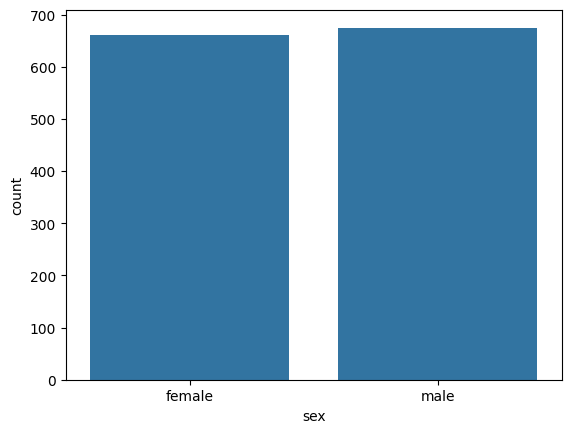

In [21]:
sbn.countplot(x = "sex", data = db)
plt.show()

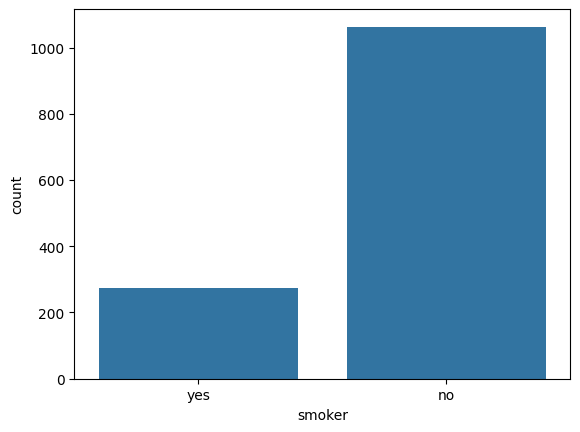

In [22]:
sbn.countplot(x = "smoker", data = db)
plt.show()

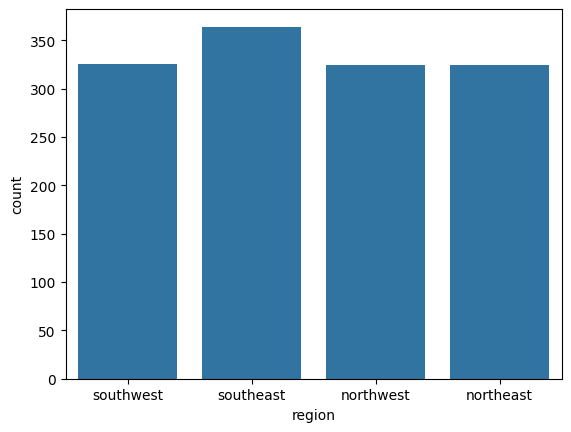

In [23]:
sbn.countplot(x = "region", data = db)
plt.show()

In [24]:
from sklearn import preprocessing

In [25]:
labelencoder = preprocessing.LabelEncoder()

In [26]:
db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
db["smoker"] = labelencoder.fit_transform(db["smoker"])
db["sex"] = labelencoder.fit_transform(db["sex"])
db["region"] = labelencoder.fit_transform(db["region"])


In [28]:
db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [29]:
db.corr()["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<Axes: >

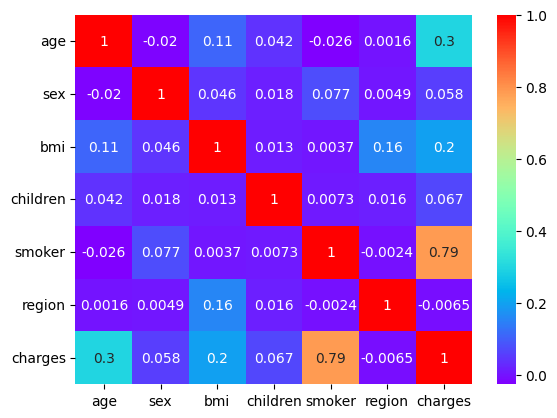

In [31]:
sbn.heatmap(db.corr(), annot = True, cmap= "rainbow")

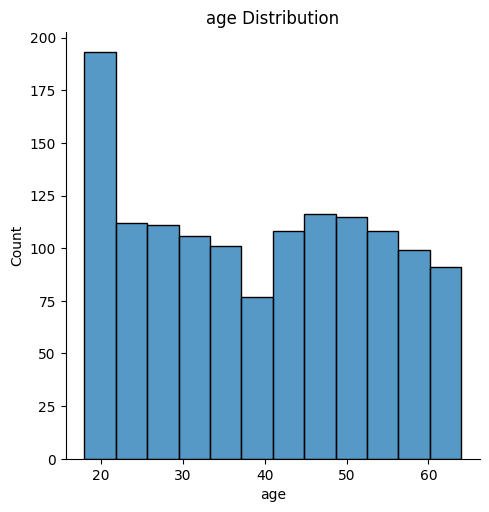

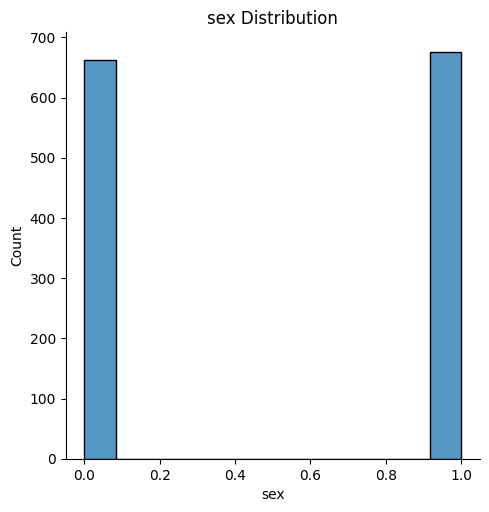

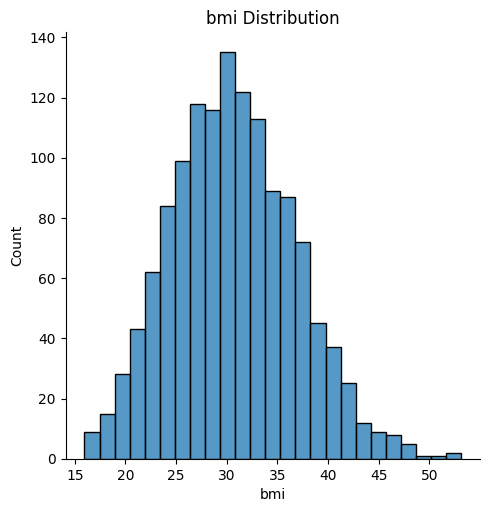

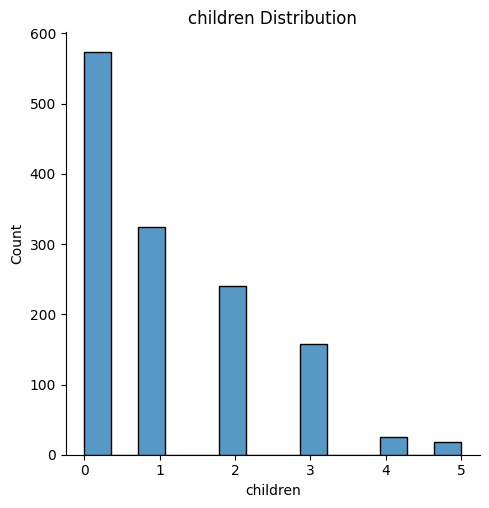

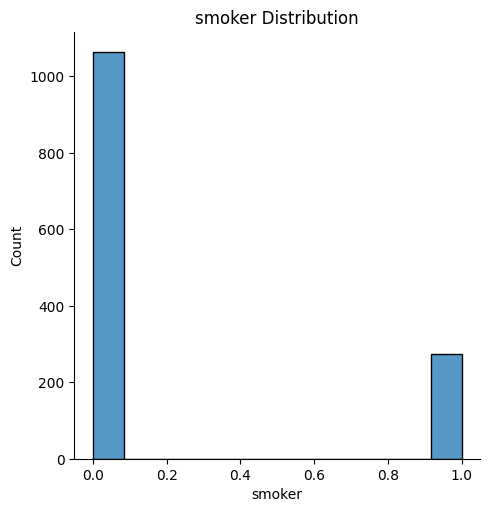

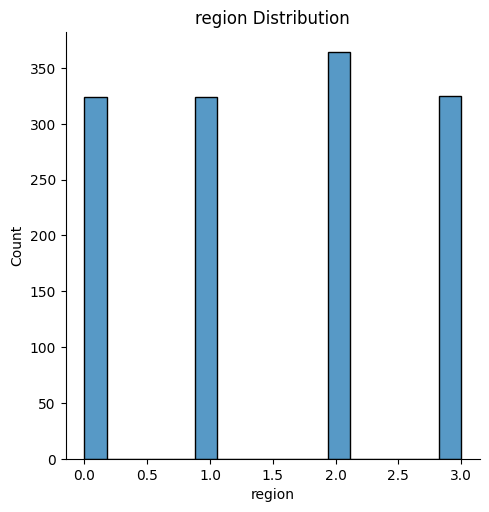

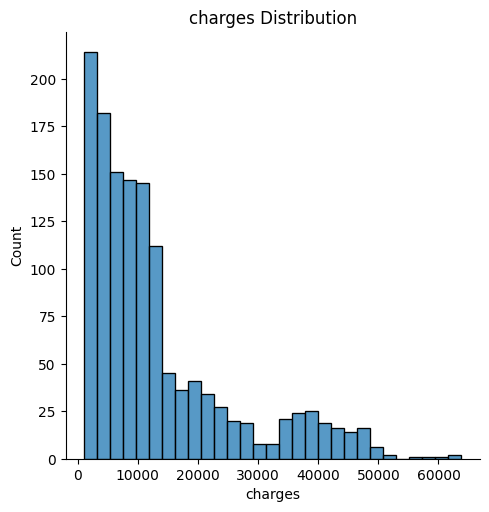

In [33]:
for i in db.columns:
  sbn.displot(db[i])
  plt.title(i + " " + "Distribution")
  plt.show()

In [38]:
colorsforrx = ["Red","Green","Yellow","Back","Blue","Grey"]
colorchanger = 0

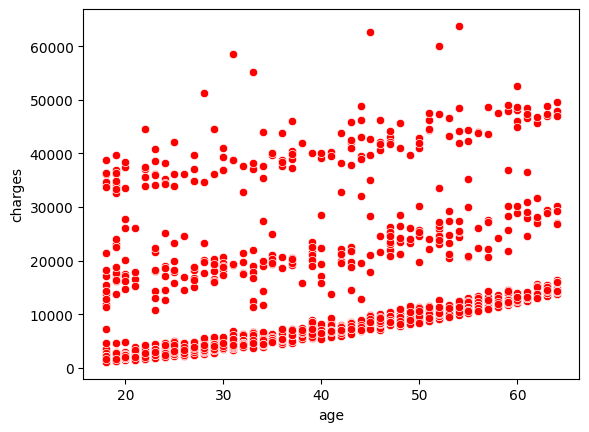

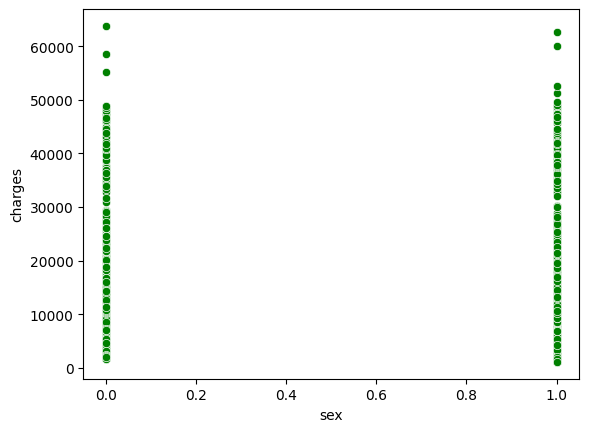

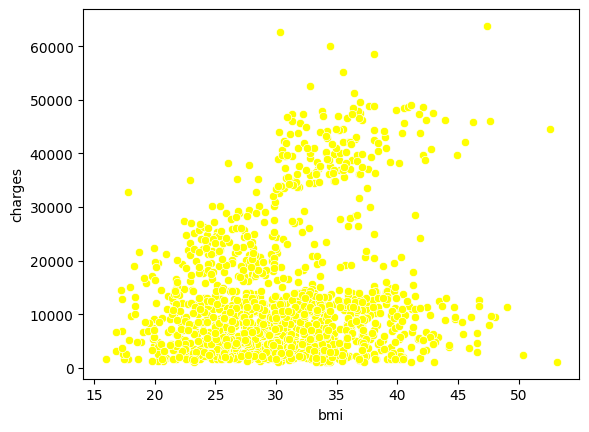

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

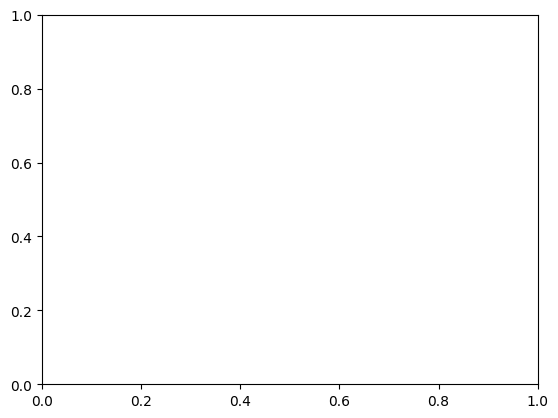

In [39]:
for i in db.columns[:-1]:
  sbn.scatterplot(data = db, x=i, y="charges", color = colorsforrx[colorchanger])
  plt.show()
  colorchanger +=1